In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
pip install scikit-learn==1.5.2

  Using cached scikit_learn-1.5.2-cp313-cp313-win_amd64.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp313-cp313-win_amd64.whl (11.0 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.7.2
    Uninstalling scikit-learn-1.7.2:
      Successfully uninstalled scikit-learn-1.7.2
Note: you may need to restart the kernel to use updated packages.


In [10]:
import sklearn
print(sklearn.__version__)


1.5.2


In [11]:
import pandas as pd

df = pd.read_csv("cardio_train.csv", sep=";")

df.rename(columns={
    "id": "Id",
    "age": "AgeInDays",
    "gender": "Gender",
    "height": "HeightCm",
    "weight": "WeightKg",
    "ap_hi": "SystolicBP",
    "ap_lo": "DiastolicBP",
    "cholesterol": "Cholesterol",
    "gluc": "Glucose",
    "smoke": "Smoking",
    "alco": "Alcohol",
    "active": "PhysicallyActive",
    "cardio": "CardioDisease"
}, inplace=True)

print(df.head())
print(df.columns)


   Id  AgeInDays  Gender  HeightCm  WeightKg  SystolicBP  DiastolicBP  \
0   0      18393       2       168      62.0         110           80   
1   1      20228       1       156      85.0         140           90   
2   2      18857       1       165      64.0         130           70   
3   3      17623       2       169      82.0         150          100   
4   4      17474       1       156      56.0         100           60   

   Cholesterol  Glucose  Smoking  Alcohol  PhysicallyActive  CardioDisease  
0            1        1        0        0                 1              0  
1            3        1        0        0                 1              1  
2            3        1        0        0                 0              1  
3            1        1        0        0                 1              1  
4            1        1        0        0                 0              0  
Index(['Id', 'AgeInDays', 'Gender', 'HeightCm', 'WeightKg', 'SystolicBP',
       'DiastolicBP', 'Ch

In [12]:

df["AgeInYears"] = (df["AgeInDays"] / 365).round(1)

df.drop(columns=["AgeInDays"], inplace=True)

df[["AgeInYears"]].describe()


,AgeInYears
count,70000.000000
mean,53.339486
std,6.759534
min,29.600000
25%,48.400000
50%,54.000000
75%,58.400000
max,65.000000


In [13]:
df.drop(columns=["Id"], inplace=True)


In [14]:
df["BMI"] = (df["WeightKg"] / ((df["HeightCm"] / 100) ** 2)).round(2)
df[["HeightCm", "WeightKg", "BMI"]].head()
print(df["BMI"].describe())

count    70000.000000
mean        27.556545
std          6.091405
min          3.470000
25%         23.880000
50%         26.375000
75%         30.220000
max        298.670000
Name: BMI, dtype: float64


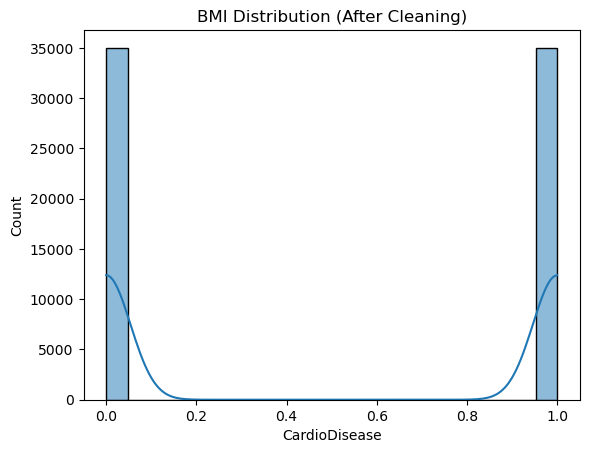

In [15]:
sns.histplot(df["CardioDisease"],kde=True)
plt.title("BMI Distribution (After Cleaning)")
plt.show()


In [16]:
df = df[(df["BMI"] >= 10) & (df["BMI"] <= 60)]

print("Data shape after BMI cleaning:", df.shape)


Data shape after BMI cleaning: (69928, 13)


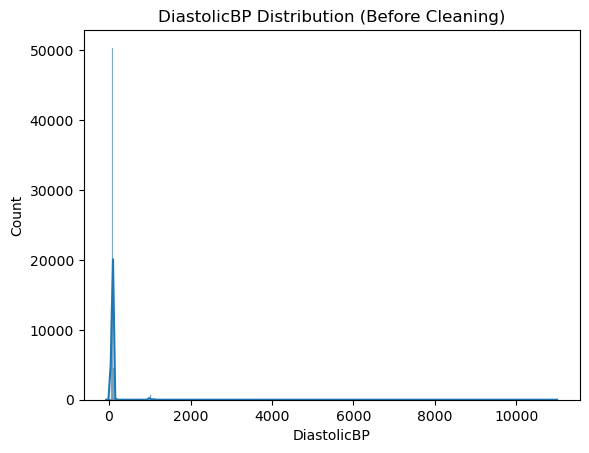

count    69928.000000
mean        96.590264
std        188.430191
min        -70.000000
25%         80.000000
50%         80.000000
75%         90.000000
max      11000.000000
Name: DiastolicBP, dtype: float64

In [17]:

sns.histplot(df["DiastolicBP"],kde=True)
plt.title("DiastolicBP Distribution (Before Cleaning)")
plt.show()
df['DiastolicBP'].describe()

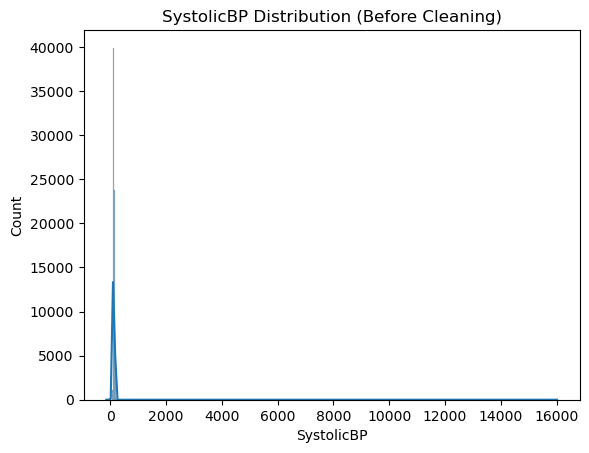

count    69928.000000
mean       128.815968
std        154.088267
min       -150.000000
25%        120.000000
50%        120.000000
75%        140.000000
max      16020.000000
Name: SystolicBP, dtype: float64

In [18]:
sns.histplot(df["SystolicBP"],kde=True)
plt.title("SystolicBP Distribution (Before Cleaning)")
plt.show()
df['SystolicBP'].describe()


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69928 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            69928 non-null  int64  
 1   HeightCm          69928 non-null  int64  
 2   WeightKg          69928 non-null  float64
 3   SystolicBP        69928 non-null  int64  
 4   DiastolicBP       69928 non-null  int64  
 5   Cholesterol       69928 non-null  int64  
 6   Glucose           69928 non-null  int64  
 7   Smoking           69928 non-null  int64  
 8   Alcohol           69928 non-null  int64  
 9   PhysicallyActive  69928 non-null  int64  
 10  CardioDisease     69928 non-null  int64  
 11  AgeInYears        69928 non-null  float64
 12  BMI               69928 non-null  float64
dtypes: float64(3), int64(10)
memory usage: 7.5 MB


In [20]:
df = df[
    (df["SystolicBP"] > df["DiastolicBP"]) &
    (df["SystolicBP"] >= 90) & (df["SystolicBP"] <= 240) &
    (df["DiastolicBP"] >= 60) & (df["DiastolicBP"] <= 160)
]

print("Data shape after BP cleaning:", df.shape)


Data shape after BP cleaning: (68428, 13)


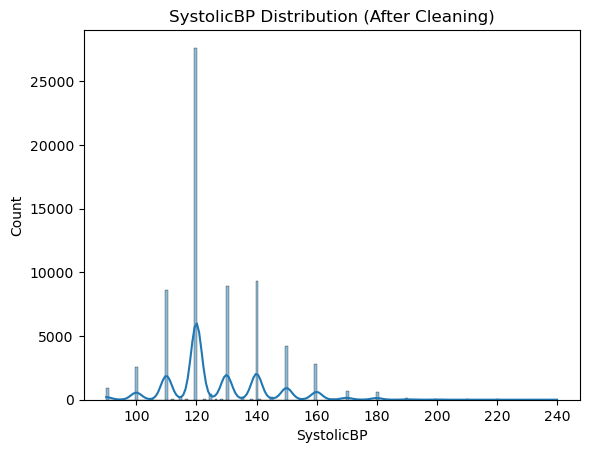

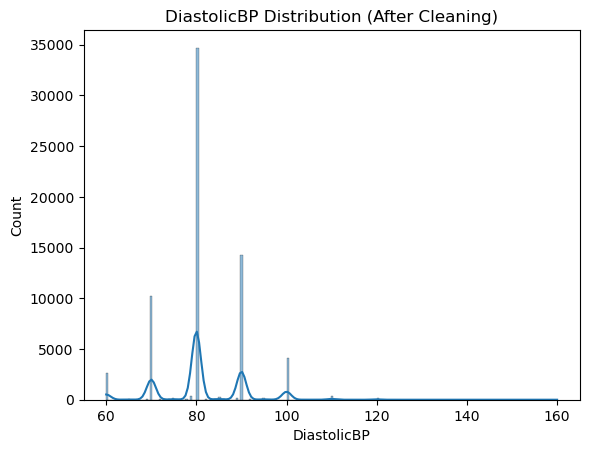

In [21]:
sns.histplot(df["SystolicBP"],kde=True)
plt.title("SystolicBP Distribution (After Cleaning)")
plt.show()

sns.histplot(df["DiastolicBP"],kde=True)
plt.title("DiastolicBP Distribution (After Cleaning)")
plt.show()

In [22]:
df["Gender"].value_counts()


Gender
1    44547
2    23881
Name: count, dtype: int64

In [23]:
df[['HeightCm','WeightKg']].describe()

,HeightCm,WeightKg
count,68428.000000,68428.000000
mean,164.418264,74.110395
std,7.939153,14.204219
min,100.000000,28.000000
25%,159.000000,65.000000
50%,165.000000,72.000000
75%,170.000000,82.000000
max,250.000000,200.000000


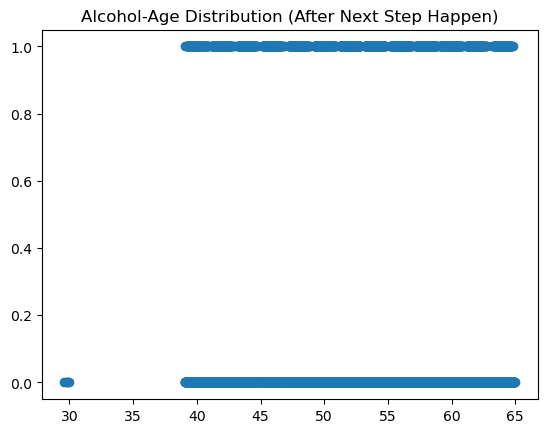

In [24]:
plt.scatter(y=df["Alcohol"],x=df['AgeInYears'])
plt.title("Alcohol-Age Distribution (After Next Step Happen)")
plt.show()


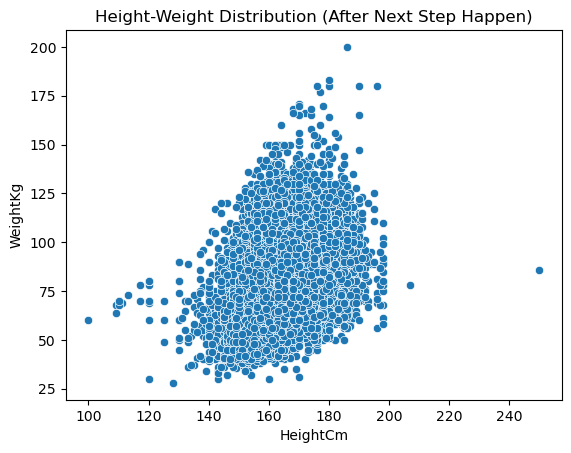

In [25]:
sns.scatterplot(x=df["HeightCm"],y=df['WeightKg'])
plt.title("Height-Weight Distribution (After Next Step Happen)")
plt.show()

In [26]:
np.sum((df["Alcohol"] == 0) & (df['AgeInYears'] < 40))

np.int64(1455)

In [27]:
df = df[(df["HeightCm"] <= 210) & (df["HeightCm"] >= 120)]
df = df[(df["WeightKg"] >= 40) & df["WeightKg"] <= 170]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68416 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            68416 non-null  int64  
 1   HeightCm          68416 non-null  int64  
 2   WeightKg          68416 non-null  float64
 3   SystolicBP        68416 non-null  int64  
 4   DiastolicBP       68416 non-null  int64  
 5   Cholesterol       68416 non-null  int64  
 6   Glucose           68416 non-null  int64  
 7   Smoking           68416 non-null  int64  
 8   Alcohol           68416 non-null  int64  
 9   PhysicallyActive  68416 non-null  int64  
 10  CardioDisease     68416 non-null  int64  
 11  AgeInYears        68416 non-null  float64
 12  BMI               68416 non-null  float64
dtypes: float64(3), int64(10)
memory usage: 7.3 MB


In [28]:
binary_cols = [
    "Smoking",
    "Alcohol",
    "PhysicallyActive",
    "CardioDisease"
]

df[binary_cols].nunique()


Smoking             2
Alcohol             2
PhysicallyActive    2
CardioDisease       2
dtype: int64

In [29]:
df["Cholesterol"] = df["Cholesterol"].astype("category")
df["Glucose"] = df["Glucose"].astype("category")

df["Gender"] = df["Gender"].astype("category")
df["Smoking"] = df["Smoking"].astype("bool")
df["Alcohol"] = df["Alcohol"].astype("bool")
df["CardioDisease"] = df["CardioDisease"].astype("bool")
df["PhysicallyActive"] = df["PhysicallyActive"].astype("bool")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68416 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Gender            68416 non-null  category
 1   HeightCm          68416 non-null  int64   
 2   WeightKg          68416 non-null  float64 
 3   SystolicBP        68416 non-null  int64   
 4   DiastolicBP       68416 non-null  int64   
 5   Cholesterol       68416 non-null  category
 6   Glucose           68416 non-null  category
 7   Smoking           68416 non-null  bool    
 8   Alcohol           68416 non-null  bool    
 9   PhysicallyActive  68416 non-null  bool    
 10  CardioDisease     68416 non-null  bool    
 11  AgeInYears        68416 non-null  float64 
 12  BMI               68416 non-null  float64 
dtypes: bool(4), category(3), float64(3), int64(3)
memory usage: 4.1 MB


In [30]:

X = df.drop(columns=["CardioDisease"])
y = df["CardioDisease"]

print(X.shape, y.shape)


(68416, 12) (68416,)


In [31]:
num_features = [
    "AgeInYears",
    "HeightCm",
    "WeightKg",
    "BMI",
    "SystolicBP",
    "DiastolicBP"
]
ordinal_features = [
    "Cholesterol",
    "Glucose",
    
]
binary_features = [
    "PhysicallyActive",
    "Smoking",
    "Alcohol"
]
gender_feature = ["Gender"]


In [ ]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [ ]:
num_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])
ordinal_transformer = Pipeline(steps=[
    ("encoder", OrdinalEncoder())
])
from sklearn.preprocessing import OneHotEncoder

gender_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(drop="first"))
])
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_features),
        ("ord", ordinal_transformer, ordinal_features),
        ("gender", gender_transformer, gender_feature)
    ],
    remainder="passthrough"
)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(X_train.shape, X_test.shape)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(
        n_estimators=300,
        max_depth=12,
        min_samples_split=10,
        class_weight="balanced",
        random_state=42,
        n_jobs=-1
    ))
])
rf_model.fit(X_train, y_train)


In [ ]:
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score

y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
# Report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# ROC-AUC
roc_rf = roc_auc_score(y_test, y_proba_rf)
print("Random Forest ROC-AUC:", roc_rf)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

rf = rf_model.named_steps['classifier']

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)


In [ ]:
plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['Feature'],
         feature_importance_df['Importance'])
plt.xlabel("Importance")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()
plt.show()


In [32]:
import joblib

joblib.dump(rf_model, "rf_pipeline.pkl")


['rf_pipeline.pkl']